<a href="https://colab.research.google.com/github/kdhaw6/Retail-Sales-Analysis---Regression-Project/blob/main/Kunal_Dhawan_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Retail Sales Prediction - The Task is to forecast the sales.

**Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.


**Business Goal**

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importing the dataset
sales_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv')

First look of the dataset

In [6]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are Null Values in the store data set, and no null values in the sales data set

### <b>DataSet Information:</b>

1. Id: id of store and a date(Interger)
2. Store - a unique Id for each store
3. Sales: Amount of Sales Dependent Variable (Numerical)
4. Customers: No. of Customers  (Numerical)
5. Open: Store open or closed (Categorical)
6. State Holiday: State Holiday or not (Categorical)
7. School Holiday: School Holiday or not (Categorical)
8. DayOfWeek: Day of the week (Categorical)
9. Store type - different types of stores: a,b,c,d (Categorical)
10. Assortment - Different types : a,b,c (Categorical)
11. CompetitionDistance - distance to the nearest competitor store (Numerical)
12. CompetitionOpenSince[Month/Year] - gives time of the competitor when it was opened (Month/ Year)
13. Promo - a store is running a promo on that day (Categorical)
14. Promo2 - Store running consecutive promotion or not (Categorical)
15. Date: Date of Sales (Date)




In [8]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Handling Missing Values

Text(0.5, 0, 'Competition Distance Distribution Plot')

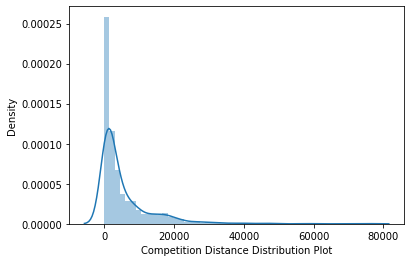

In [10]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.



In [9]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace= True)

CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

In [10]:
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0

In [11]:
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [14]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Merging Both the data sets

In [12]:
dataset = sales_df.merge(right=store_df, on="Store", how="left")

In [13]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [17]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [18]:
dataset.isnull().sum().sum()

0

Checking for Duplicates - there are no duplicates

# **Exploratory Data Analysis**

Converting and Splitting Date

Extracting from date

In [14]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [15]:
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['WeekOfYear'] = dataset['Date'].dt.isocalendar().week
dataset['DayOfYear'] = dataset['Date'].dt.dayofyear
years = dataset['Year'].unique()




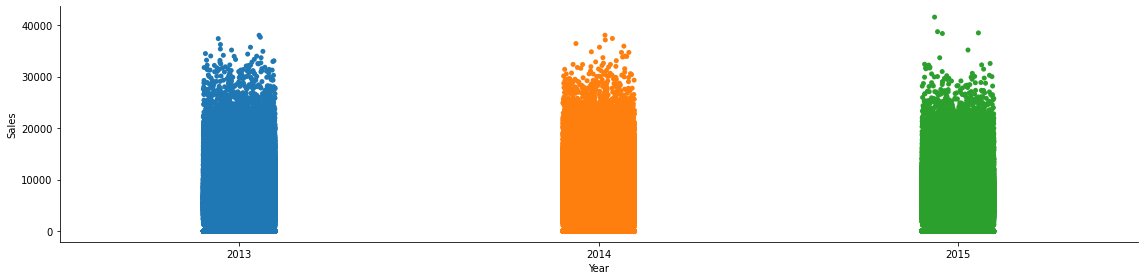

In [21]:
sns.catplot(x='Year',y='Sales',data=dataset, height=4, aspect=4 );

We can see that there is not such significant differences in these 3 years in terms of sales

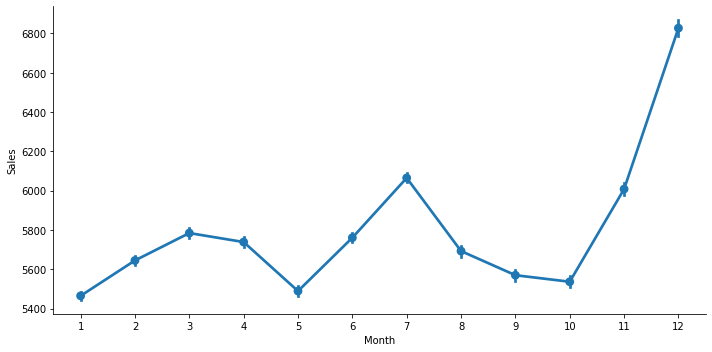

In [22]:
sns.factorplot(x="Month" ,y = "Sales" , data=dataset, kind="point", aspect=2,size=5)

As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year in the festival season.


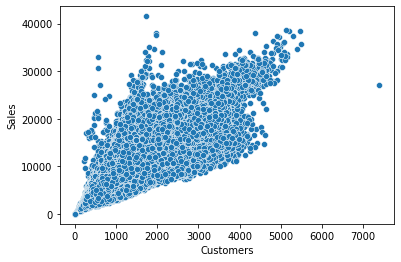

In [ ]:
sns.scatterplot(x=dataset['Customers'], y=dataset['Sales'])

Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

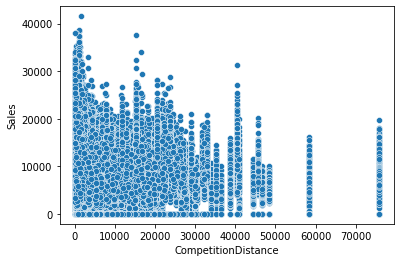

In [ ]:
sns.scatterplot(x=dataset['CompetitionDistance'], y=dataset['Sales'])

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

**Analysis of Categorical Variables**

In [ ]:
categorical_features = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

In [ ]:
categorical_features

['DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'Promo2',
 'Promo2SinceYear',
 'PromoInterval']

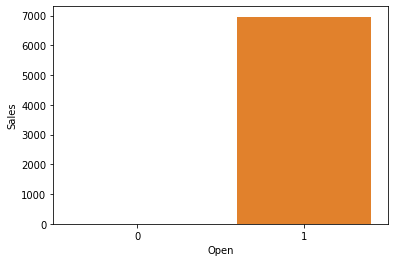

In [23]:
sns.barplot(x='Open', y='Sales',data = dataset)

As expected, if the store is closed there wont be any sales.

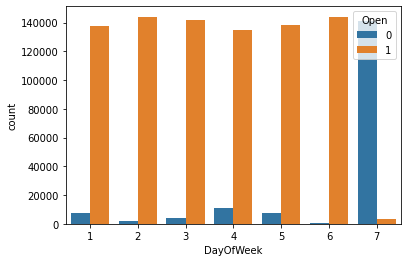

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data=dataset)

Shops have generally remained closed on Sunday

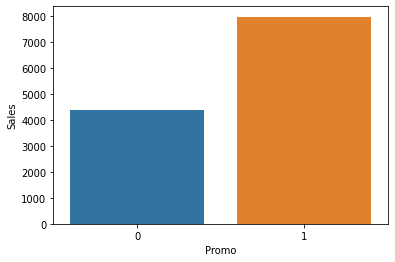

In [ ]:
Promo_sales = pd.DataFrame(dataset.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

Sales Are nearly doubled High When Promo is Running






In [58]:
dataset['StateHoliday'].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

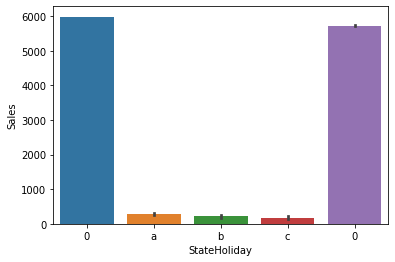

In [25]:
sns.barplot(x= 'StateHoliday', y='Sales', data = dataset)

In [29]:
dataset['StateHoliday'].replace({'0':0,'a':1, 'b':1,'c':1}, inplace=True)

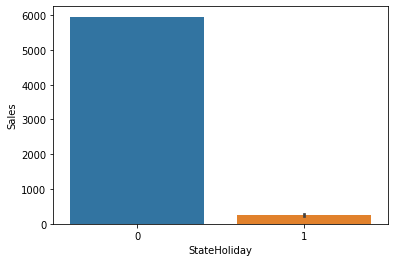

In [47]:
sns.barplot(x= 'StateHoliday', y='Sales', data = dataset)

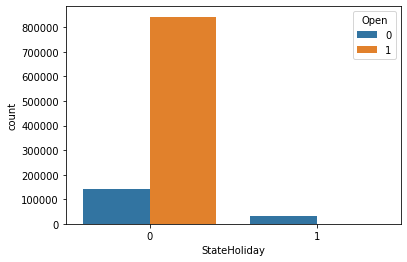

In [28]:
sns.countplot(x='StateHoliday',hue='Open',data=dataset)

Normally all stores, with few exceptions, are closed on state holidays. Hence less sales on holidays and more sales on non holidays

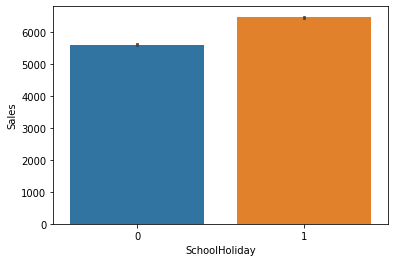

In [ ]:
sns.barplot(x= 'SchoolHoliday', y='Sales', data = dataset)

More sales on school holidays

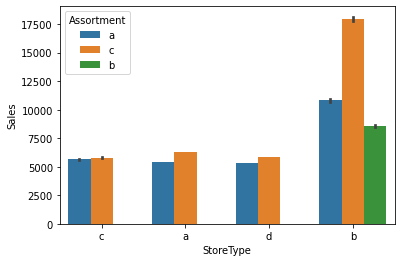

In [ ]:
sns.barplot(x=dataset["StoreType"],y=dataset['Sales'],hue=dataset["Assortment"])

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

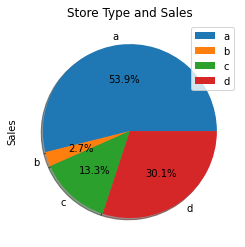

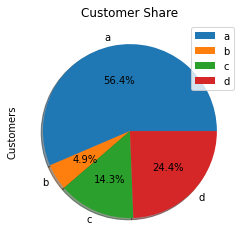

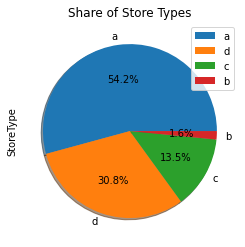

In [ ]:
#let's explore store type a bit and it's influence on sales
dataset.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
dataset.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
dataset["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

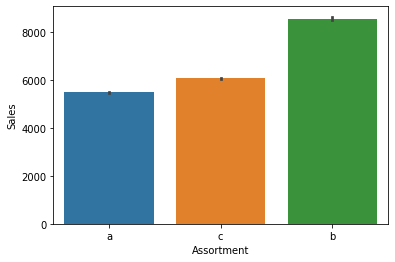

In [ ]:
sns.barplot(x='Assortment', y='Sales', data = dataset)

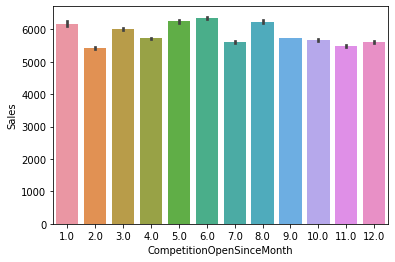

In [ ]:
sns.barplot(x='CompetitionOpenSinceMonth', y='Sales', data = dataset)

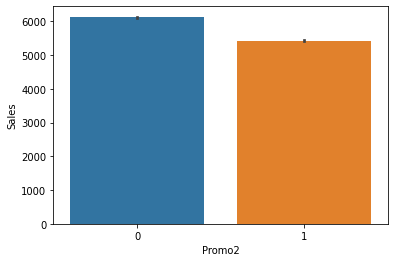

In [ ]:
sns.barplot(x='Promo2', y='Sales', data = dataset)

With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

**Correlation Matrix**

By checking the correlation the factors affecting sales can be figured out.

In [32]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = dataset.drop(columns = columns_to_drop, axis =1)

In [33]:
corr_df.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month'],
      dtype='object')

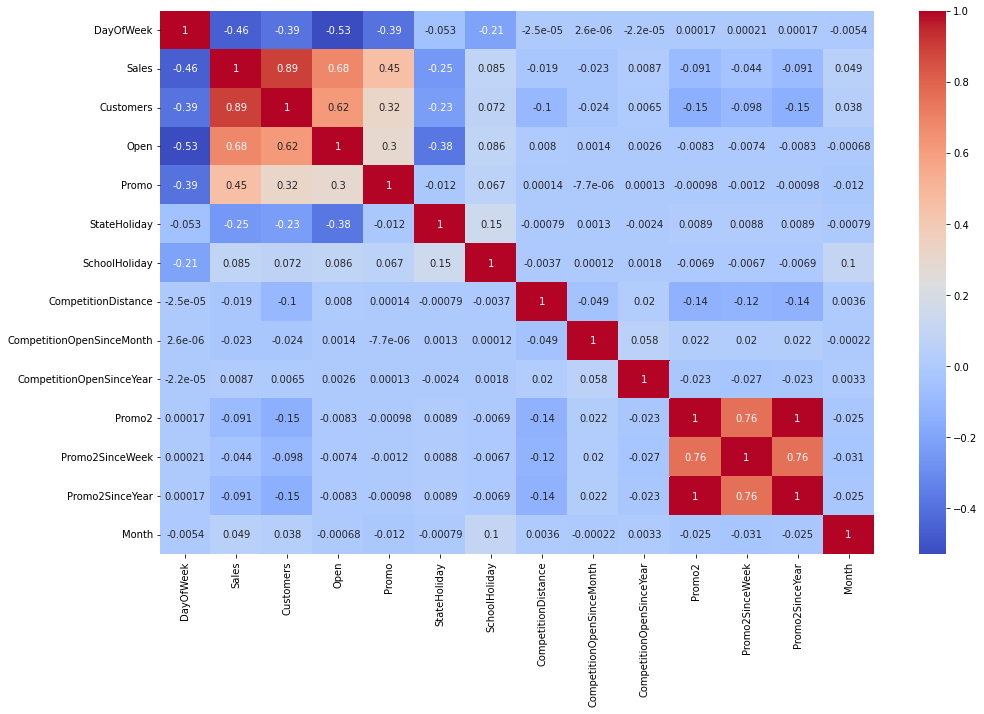

In [34]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

Observation:
1. Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
2. State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
3. CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
4. There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
5. The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

**Data Manupilation, feature engineering and selection**

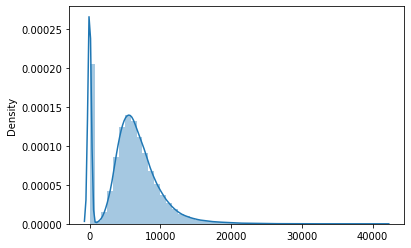

In [35]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=dataset['Sales'])

In [59]:
#no of observations for closed stores with 0 sales
(dataset[dataset['Open'] == 0]).shape

(172817, 22)

In [60]:
#Keeping only values where the stores were open in the dataset
new_dataset = dataset[dataset['Open'] != 0]
new_dataset.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


In [61]:
#since the stores closed had 0 sale value; removing the irrelevant part
new_dataset.drop('Open', axis = 1, inplace = True)

In [62]:
new_dataset.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212


Text(0.5, 0, 'Sales')

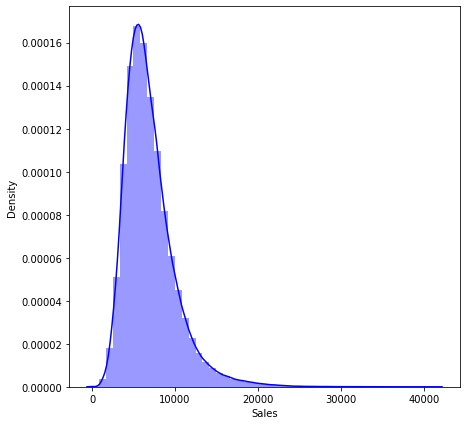

In [20]:
plt.figure(figsize=(7,7))
sns.distplot(new_dataset['Sales'], color='b')
plt.xlabel('Sales')

In [63]:
#combining competition open since month and year into total months
new_dataset['CompetitionOpen'] = (new_dataset['Year'] - new_dataset['CompetitionOpenSinceYear'])*12 + (new_dataset['Month'] - new_dataset['CompetitionOpenSinceMonth'])


In [64]:
new_dataset['CompetitionOpen'] = new_dataset['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
new_dataset.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [65]:
new_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,0,0.0,0.0,0,2015,7,31,212,82.0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212,92.0
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,103.0
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,0,0.0,0.0,0,2015,7,31,212,70.0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,0,0.0,0.0,0,2015,7,31,212,3.0


Let's remove Multicolnearity

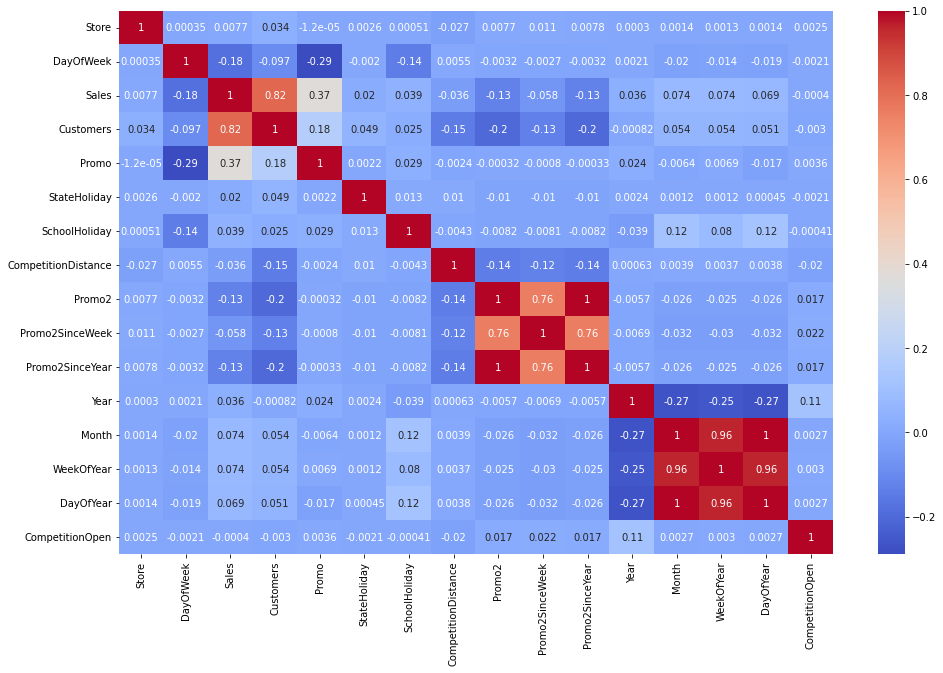

In [66]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(new_dataset.corr(), cmap="coolwarm", annot=True)

lets drop columns with high multicolleanirty

In [67]:
new_dataset.drop(['Store','Promo2SinceWeek','Promo2SinceYear','PromoInterval', 'WeekOfYear', 'DayOfYear' ], axis=1, inplace=True)

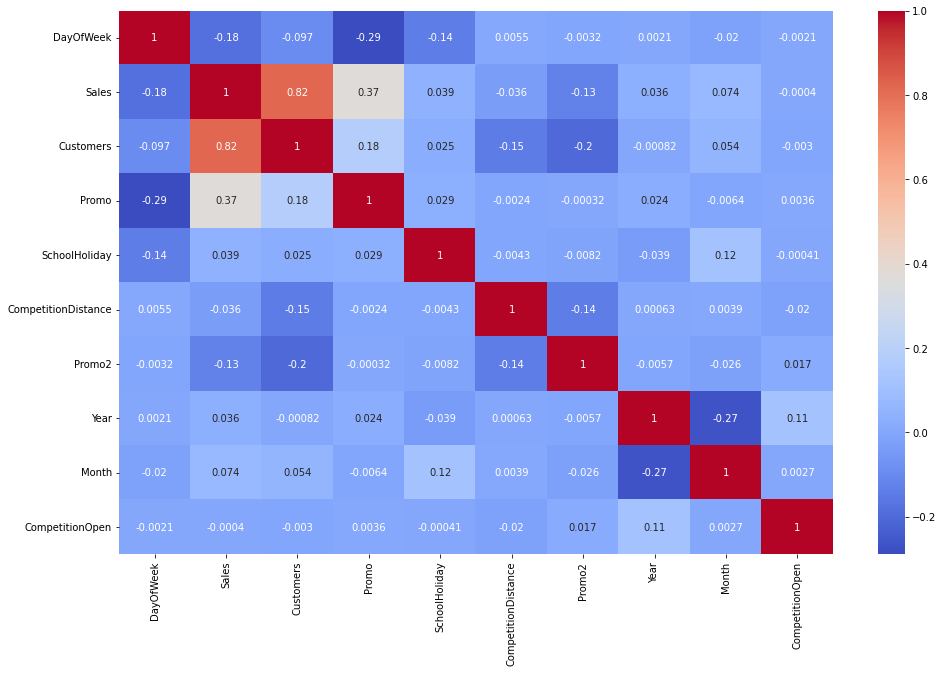

In [24]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(new_dataset.corr(), cmap="coolwarm", annot=True)

Converting Store type and Assortment to 0 and 1 values

In [68]:
new_dataset = pd.get_dummies(new_dataset,columns=['StoreType','Assortment'])

In [69]:
new_dataset['Promo2'].value_counts()

0    423307
1    421085
Name: Promo2, dtype: int64

In [70]:
new_dataset.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Year', 'Month',
       'CompetitionOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

Removing Outliers

In [71]:
new_dataset.shape

(844392, 19)

In [72]:
#Checking for values where store were open still the sales were 0
# Removing those values to remove the Bias
new_dataset = new_dataset[new_dataset.Sales != 0]

In [73]:
new_dataset.query('Sales == 0')

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,CompetitionOpen,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c


In [44]:
#removing outliers / Don't run
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [45]:
#We Can also remove outliers using following method, but our models were performing better withour removing the outliers and hence I have not removed them.
df2= remove_outlier(new_dataset, 'Sales')

In [152]:
#just in case something messes up
df2 = new_dataset.copy()

In [153]:
df2.shape

(844337, 19)

In [154]:
df2['Sales'] = np.log10(df2['Sales'])

In [38]:
df2[df2['Sales'] == float('-inf')]

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,CompetitionOpen,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c


In [ ]:
df2.drop(df2[df2['Sales'] == float("-inf")].index,inplace=True)

In [ ]:
df2[df2['Sales'] == float('-inf')]

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,...,WeekOfYear,DayOfYear,CompetitionOpen,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c


In [155]:
df2['CompetitionDistance'] = np.log10(df2['CompetitionDistance'])

In [156]:
df2['Customers'] = np.log10(df2['Customers'])

In [ ]:
df2.drop(df2[df2['Customers'] == float("-inf")].index,inplace=True)

In [ ]:
df2[df2['Customers'] == float('-inf')]

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,...,WeekOfYear,DayOfYear,CompetitionOpen,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DayOfWeek            844338 non-null  int64         
 1   Date                 844338 non-null  datetime64[ns]
 2   Sales                844338 non-null  float64       
 3   Customers            844338 non-null  float64       
 4   Promo                844338 non-null  int64         
 5   StateHoliday         844338 non-null  int64         
 6   SchoolHoliday        844338 non-null  int64         
 7   CompetitionDistance  844338 non-null  float64       
 8   Promo2               844338 non-null  int64         
 9   Year                 844338 non-null  int64         
 10  Month                844338 non-null  int64         
 11  CompetitionOpen      844338 non-null  float64       
 12  StoreType_a          844338 non-null  uint8         
 13  StoreType_b  

Setting Features and Target Variables

In [157]:
X = df2.drop(['Sales','Year','Date'] , axis = 1)
y= df2.Sales


In [158]:
X.shape

(844337, 16)

In [104]:
X.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Month,CompetitionOpen,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,2.744293,1,0,1,3.103804,0,7,82.0,0,0,1,0,1,0,0
1,5,2.795880,1,0,1,2.755875,1,7,92.0,1,0,0,0,1,0,0
2,5,2.914343,1,0,1,4.150142,1,7,103.0,1,0,0,0,1,0,0
3,5,3.175512,1,0,1,2.792392,0,7,70.0,0,0,1,0,0,0,1
4,5,2.747412,1,0,1,4.475816,0,7,3.0,1,0,0,0,1,0,0


In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            844338 non-null  int64  
 1   Customers            844338 non-null  float64
 2   Promo                844338 non-null  int64  
 3   StateHoliday         844338 non-null  int64  
 4   SchoolHoliday        844338 non-null  int64  
 5   CompetitionDistance  844338 non-null  float64
 6   Promo2               844338 non-null  int64  
 7   Month                844338 non-null  int64  
 8   CompetitionOpen      844338 non-null  float64
 9   StoreType_a          844338 non-null  uint8  
 10  StoreType_b          844338 non-null  uint8  
 11  StoreType_c          844338 non-null  uint8  
 12  StoreType_d          844338 non-null  uint8  
 13  Assortment_a         844338 non-null  uint8  
 14  Assortment_b         844338 non-null  uint8  
 15  Assortment_c    

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [160]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [162]:
regressor.intercept_

392964440515.8885

In [163]:
regressor.coef_

array([-2.30857033e-03,  2.65071348e+00,  6.07614403e-02, -4.41103240e-03,
        1.74194767e-03,  1.36419847e-01,  3.19547881e-02,  1.08680870e-02,
        6.76708191e-02,  3.06364502e+09,  3.06364502e+09,  3.06364502e+09,
        3.06364502e+09, -3.96028086e+11, -3.96028086e+11, -3.96028086e+11])

In [164]:
y_pred_train = regressor.predict(X_train)

In [165]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [166]:
mean_squared_error(10**(y_test), 10**(y_pred))

1336209.146974289

In [167]:
# Test performance
math.sqrt(mean_squared_error(10**(y_test), 10**(y_pred)))

1155.9451314722032

In [171]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.8683035500975727

In [172]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.8686491390126709

In [176]:
#getting r2 score
r2_score_1 = r2_score(10**(y_test), 10**(y_pred))
adjusted_r2_score_1 = 1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [177]:
print(r2_score_1)
print(adjusted_r2_score_1)

0.8611618882027308
0.8611531178065811


In [178]:
def mean_absolute_percentage_error(y_t, y_p):
    y_t, y_p = np.array(y_t), np.array(y_p)
    return np.mean(np.abs((y_t - y_p) / y_t)) * 100


In [181]:
MAPE_1 = mean_absolute_percentage_error(y_test,y_pred)
MAPE_1

1.404030802115448

Text(0, 0.5, 'Predicted Sales')

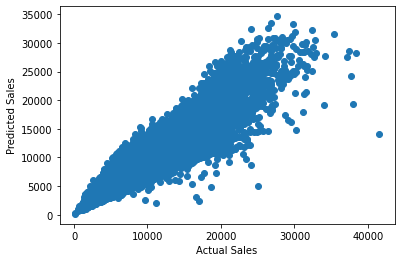

In [182]:
plt.scatter(10**(y_test), 10**(y_pred))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

In [135]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [136]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

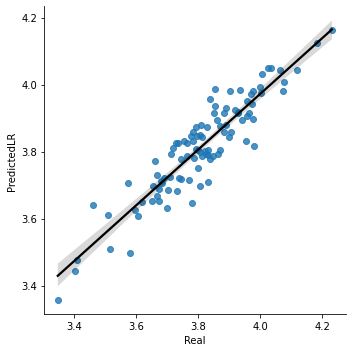

In [137]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

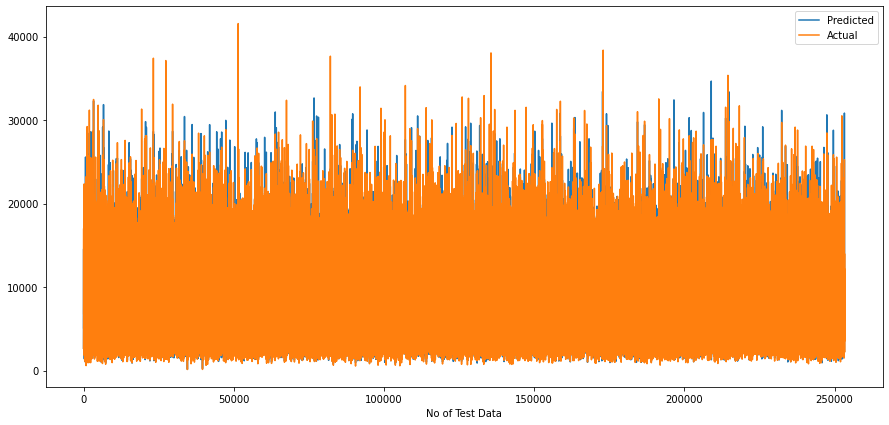

In [183]:
plt.figure(figsize=(15,7))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [139]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.980e+05
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:47:22   Log-Likelihood:             1.0842e+06
No. Observations:              844338   AIC:                        -2.168e+06
Df Residuals:                  844323   BIC:                        -2.168e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5602      0.001    567.306      0.000       0.558       0.562
DayOfWeek              -0.0004   4.49e-05     -8.973      0.000      -0.000      -0.000
Customers               0.9342      0.000   2025.090      0.000       0.933       0.935
Promo                   0.0608      0.000    384.021      0.000       0.061       0.061
StateHoliday           -0.0010      0.002     -0.457      0.648      -0.005       0.003
SchoolHoliday           0.0018      0.000      9.766      0.000       0.001       0.002
CompetitionDistance     0.0382      0.000    322.531      0.000       0.038       0.038
Promo2                  0.0319      0.000    208.622      0.000       0.032       0.032
Month                   0.0010   2.21e-05     44.507      0.000       0.001       0.001
CompetitionOpen      4.895e-05   1.15e-06     42.554      0.000    4.67e-05    5.12e-05
StoreType_a             0.1455      0.000    464.816      0.000       0.145       0.146
StoreType_b             0.0558      0.001     81.242      0.000       0.054       0.057
StoreType_c             0.1351      0.000    393.657      0.000       0.134       0.136
StoreType_d             0.2238      0.000    710.064      0.000       0.223       0.224
Assortment_a            0.2446      0.000    555.523      0.000       0.244       0.245
Assortment_b            0.0573      0.001     68.236      0.000       0.056       0.059
Assortment_c            0.2583      0.000    559.226      0.000       0.257       0.259
==============================================================================
Omnibus:                     4755.884   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6998.634
Skew:                          -0.018   Prob(JB):                         0.00
Kurtosis:                       3.444   Cond. No.                     3.88e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.41e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Implementing Lasso Regression

In [184]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [185]:
lasso.score(X_train, y_train)

0.6329124885348806

In [186]:
train_score_2=lasso.score(X_train,y_train)
train_score_2

0.6329124885348806

In [187]:
test_score_2=lasso.score(X_test,y_test)
test_score_2

0.6333198454881402

In [188]:
y_pred_l = lasso.predict(X_test)

In [189]:
r2_score_2 = r2_score(10**(y_test), 10**(y_pred_l))
adjusted_r2_score_2 = 1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("R2 :" ,r2_score_2)
print("Adjusted R2 : ", adjusted_r2_score_2)

R2 : 0.5613616722110015
Adjusted R2 :  0.5613339634511277


In [190]:
MAPE_2 = mean_absolute_percentage_error(y_test,y_pred_l)
MAPE_2

2.311962342878468

In [191]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


MSE : 4221553.708977294
MAE : 1393.2229392959707
RMSE : 2054.6419904638606


Implementing Cross-Validation Procedure for Lasso

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [194]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08}  the negative mean squared error is:  -0.004489405332341534


In [195]:
y_pred_lasso_cv = lasso_regressor.predict(X_test)

In [196]:
train_score_3 = lasso_regressor.score(X_train, y_train)
test_score_3 = lasso_regressor.score(X_test, y_test)
r2_score_3 = r2_score(10**(y_test), 10**(y_pred_lasso_cv))
adjusted_r2_score_3 = 1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(train_score_3, test_score_3, r2_score_3, adjusted_r2_score_3)

-0.0044891442598413555 -0.004488194467605285 0.861143062396911 0.8611342908115363


In [197]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso_cv))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso_cv))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1336390.3307545206
MAE : 839.941284060028
RMSE : 1156.0234992224512
R2 : 0.861143062396911
Adjusted R2 :  0.8611342908115363


In [198]:
MAPE_3 = mean_absolute_percentage_error(y_test,y_pred_lasso_cv)
MAPE_3

1.4040077678085359

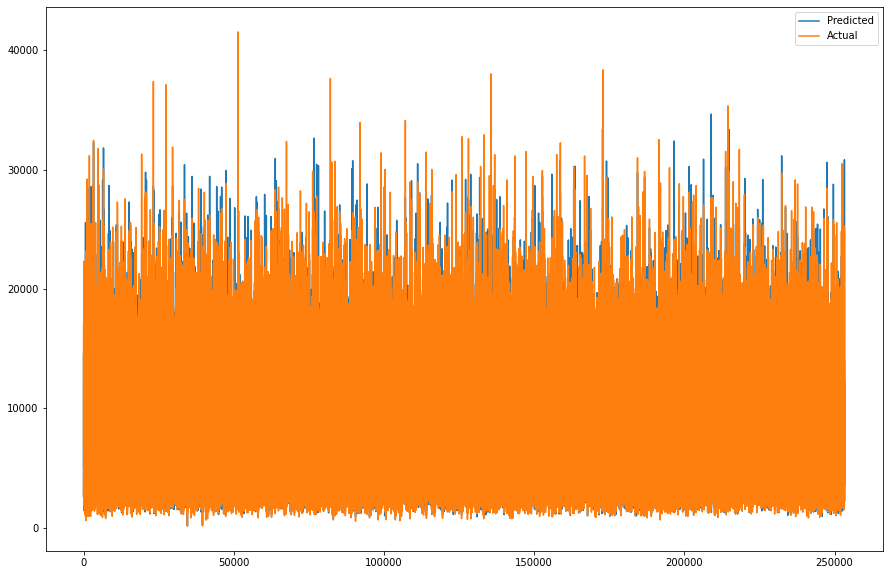

In [200]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_lasso_cv))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Implementing Elastic Net

In [201]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [202]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [203]:
y_pred_en = elasticnet.predict(X_test)

In [204]:
train_score_4 = elasticnet.score(X_train,y_train)
test_score_4 = elasticnet.score(X_test,y_test)
r2_score_4 = r2_score(10**(y_test), 10**(y_pred_en))
adjusted_r2_score_4 = 1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [205]:
print(train_score_4, test_score_4, r2_score_4, adjusted_r2_score_4)

0.0 -5.682868921441653e-06 -0.03633985345090651 -0.03640531898441712


In [206]:
MAPE_4 = mean_absolute_percentage_error(y_test,y_pred_en)
MAPE_4

3.8172795230953427

In [207]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 9973967.332378628
RMSE : 3158.1588516695338


In [ ]:
#elastic = ElasticNet()
#parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
#elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
#elastic_regressor.fit(X_train, y_train)

I did not run cross validation foe EN as it was taking a lot of time to run, rather I implented the Decision tree model

In [208]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [209]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [210]:
train_score_5=treereg.score(X_train, y_train)
test_score_5=treereg.score(X_test, y_test)

In [211]:
y_pred_tree = treereg.predict(X_test)

In [212]:
print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)

Regresion Model Score : 0.9999409260109166 , Test Score : 0.9464635560627036


In [215]:
r2_score_5 = r2_score(10**(y_test), 10**(y_pred_tree))
print(r2_score_5)

0.9406015335146609


In [216]:
adjusted_r2_score_5 = 1-(1-r2_score(10**(y_test), 10**(y_pred_tree)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [217]:
print(adjusted_r2_score_5)

0.9405977813166873


In [218]:
MAPE_5 = mean_absolute_percentage_error(y_test,y_pred_tree)
MAPE_5

0.8151070892745961

In [219]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],
                         'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5],
                         'R2':[r2_score_1,r2_score_2,r2_score_3,r2_score_4,r2_score_5],
                         'adj.r2':[adjusted_r2_score_1, adjusted_r2_score_2, adjusted_r2_score_3, adjusted_r2_score_4, adjusted_r2_score_5],
                         'MAPE':[MAPE_1,MAPE_2,MAPE_3,MAPE_4,MAPE_5]}
                        ,index=['Linear Regression','Lasso Regression','Lasso CV',"Elastic Net",'Descion Tree'])


In [220]:
score_df

,Train_Score,Test_Score,R2,adj.r2,MAPE
Linear Regression,0.868304,0.868649,0.861162,0.861153,1.404031
Lasso Regression,0.632912,0.633320,0.561362,0.561334,2.311962
Lasso CV,-0.004489,-0.004488,0.861143,0.861134,1.404008
Elastic Net,0.000000,-0.000006,-0.036340,-0.036405,3.817280
Descion Tree,0.999941,0.946464,0.940602,0.940598,0.815107


**Model Conclusion**

As we can see, R2 and Adj R2 best score is for discsion tree model and MAPE is the lowest. Hence it is highest accurate model.




Conclusions :

1. There's a positive correlation between customers and sales which is explanatory.

2. Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

3. The positive effect of promotion on Customers and Sales is observable.

4. It is clear that most of the stores remain closed during State and School Holidays.

5. But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

6. When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

7. Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.